# problem statement


# Importing some important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

dataset=pd.read_csv('C:/Users/virendra/Downloads/Class Recordings/1 ML PROJECT/incident_event_log.csv',na_values='?')
data=pd.read_csv('C:/Users/virendra/Downloads/Class Recordings/1 ML PROJECT/incident_event_log.csv',na_values='?')  
data.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


# 1. Missing Values 

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141683 non-null  object
 8   opened_by                136877 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           88636 non-null   object
 11  sys_created_at           88636 non-null   object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

<AxesSubplot:>

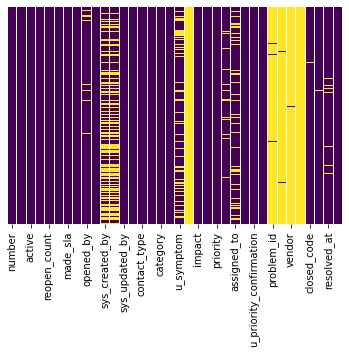

In [3]:
import seaborn as sns
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [4]:
data.drop(['number','opened_by','sys_created_by','sys_created_at','sys_updated_by','sys_updated_at','cmdb_ci','problem_id',
           'rfc','vendor','caller_id','assignment_group','assigned_to','problem_id','resolved_by','caused_by','closed_code',
           'closed_at'],axis=1,inplace=True)

In [5]:
data.head()

,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,opened_at,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,knowledge,u_priority_confirmation,notify,resolved_at
0,New,True,0,0,0,True,29/2/2016 01:16,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,29/2/2016 11:29
1,Resolved,True,0,0,2,True,29/2/2016 01:16,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,29/2/2016 11:29
2,Resolved,True,0,0,3,True,29/2/2016 01:16,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,29/2/2016 11:29
3,Closed,False,0,0,4,True,29/2/2016 01:16,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,29/2/2016 11:29
4,New,True,0,0,0,True,29/2/2016 04:40,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,1/3/2016 09:52


<AxesSubplot:>

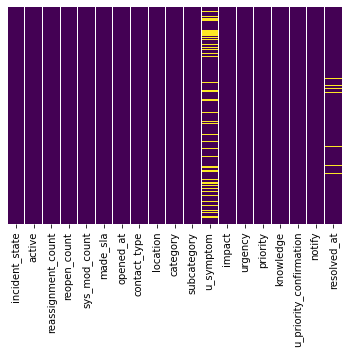

In [6]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
data.isnull().sum()

incident_state                 0
active                         0
reassignment_count             0
reopen_count                   0
sys_mod_count                  0
made_sla                       0
opened_at                      0
contact_type                   0
location                      76
category                      78
subcategory                  111
u_symptom                  32964
impact                         0
urgency                        0
priority                       0
knowledge                      0
u_priority_confirmation        0
notify                         0
resolved_at                 3141
dtype: int64

#Random Sampling Imputation for 'u_symptom' feature

In [8]:
data['u_symptom'].dropna().sample(data['u_symptom'].isnull().sum(),random_state=0).head()

118039    Symptom 491
112962    Symptom 115
73885     Symptom 534
64338     Symptom 102
39846     Symptom 491
Name: u_symptom, dtype: object

In [9]:
random_sample=data['u_symptom'].dropna().sample(data['u_symptom'].isnull().sum(),random_state=0)

In [10]:
import numpy as np

random_sample.index=data[data['u_symptom'].isnull()].index
data.loc[data['u_symptom'].isnull(),'u_symptom']=random_sample

#Mode Imputaion for ['location','category','subcategory']

In [11]:
data['location'].fillna(data['location'].mode()[0],inplace=True)
data['category'].fillna(data['category'].mode()[0],inplace=True)
data['subcategory'].fillna(data['subcategory'].mode()[0],inplace=True)

In [12]:
data.isnull().sum().sum()

3141

In [13]:
data.head(2)

,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,opened_at,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,knowledge,u_priority_confirmation,notify,resolved_at
0,New,True,0,0,0,True,29/2/2016 01:16,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,29/2/2016 11:29
1,Resolved,True,0,0,2,True,29/2/2016 01:16,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,29/2/2016 11:29


In [14]:
data['resolved_at'].mode()[0]

'3/6/2016 16:29'

In [15]:
data['opened_at']=pd.to_datetime(data['opened_at'])
data[['resolved_at']]=pd.to_datetime(data['resolved_at'])

In [16]:
d=np.round((data['resolved_at']-data['opened_at']) / np.timedelta64(1,'M'),4)
date=pd.concat([data['opened_at'],data['resolved_at'],d],axis=1)
date.columns=['opened_at','resolved_at','resolved_months']
date.tail()

,opened_at,resolved_at,resolved_months
141707,2017-02-16 09:09:00,2017-02-16 09:53:00,0.0010
141708,2017-02-16 14:17:00,2017-02-16 16:38:00,0.0032
141709,2017-02-16 14:17:00,2017-02-16 16:38:00,0.0032
141710,2017-02-16 14:17:00,2017-02-16 16:38:00,0.0032
141711,2017-02-16 14:17:00,2017-02-16 16:38:00,0.0032


In [17]:
date[date['resolved_months']<=0].count()

opened_at          28502
resolved_at        28502
resolved_months    28502
dtype: int64

In [18]:
for i,v in enumerate(date['resolved_months'],0):
    while v <=0:
            date.loc[i,'resolved_at']=date.loc[i,'resolved_at']+ np.timedelta64(31, 'D')
            v = np.round((date.loc[i,'resolved_at']-date.loc[i,'opened_at']) / np.timedelta64(1,'M'),4)

In [19]:
data[['opened_at','resolved_at']].head(10)

,opened_at,resolved_at
0,2016-02-29 01:16:00,2016-02-29 11:29:00
1,2016-02-29 01:16:00,2016-02-29 11:29:00
2,2016-02-29 01:16:00,2016-02-29 11:29:00
3,2016-02-29 01:16:00,2016-02-29 11:29:00
4,2016-02-29 04:40:00,2016-01-03 09:52:00
5,2016-02-29 04:40:00,2016-01-03 09:52:00
6,2016-02-29 04:40:00,2016-01-03 09:52:00
7,2016-02-29 04:40:00,2016-01-03 09:52:00
8,2016-02-29 04:40:00,2016-01-03 09:52:00
9,2016-02-29 04:40:00,2016-01-03 09:52:00


In [20]:
date['resolved_Months']=np.round((date['resolved_at']-date['opened_at']) / np.timedelta64(1,'M'),4)
date.head()

,opened_at,resolved_at,resolved_months,resolved_Months
0,2016-02-29 01:16:00,2016-02-29 11:29:00,0.0140,0.0140
1,2016-02-29 01:16:00,2016-02-29 11:29:00,0.0140,0.0140
2,2016-02-29 01:16:00,2016-02-29 11:29:00,0.0140,0.0140
3,2016-02-29 01:16:00,2016-02-29 11:29:00,0.0140,0.0140
4,2016-02-29 04:40:00,2016-03-05 09:52:00,-1.8656,0.1714


In [21]:
date['resolved_Months'].fillna(method='ffill',inplace=True)

In [22]:
date['resolved_Months'].isnull().sum()

0

In [23]:
data.drop(columns=['opened_at','resolved_at'],inplace=True)

In [24]:
data.insert(5,'resolved_in_months',date['resolved_Months'])

In [25]:
data.isnull().sum().sum()

0

<AxesSubplot:>

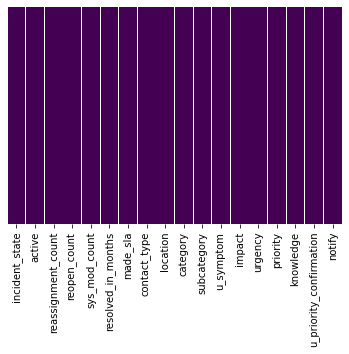

In [26]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

*__*Here we have treated all missing values.__*

# 2. Impossible Values
*__*we don't have immpossible values in this dataset.__*

In [27]:
data.isna().sum().sum()

0

# 3. Feature Engineering

In [28]:
data['notify'].value_counts()

Do Not Notify    141593
Send Email          119
Name: notify, dtype: int64

In [29]:
data['knowledge'] = np.where(data['knowledge']==True,1,0)
data['notify'] = np.where(data['notify']=='Send Email',1,0)
data['active'] = np.where(data['active']==True,1,0)
data['made_sla'] = np.where(data['made_sla']==True,1,0)
data['u_priority_confirmation'] = np.where(data['u_priority_confirmation']==True,1,0)

In [30]:
for i in data.columns:
    print(i,':',len(data[i].value_counts()))

incident_state : 9
active : 2
reassignment_count : 28
reopen_count : 9
sys_mod_count : 115
resolved_in_months : 7866
made_sla : 2
contact_type : 5
location : 224
category : 58
subcategory : 254
u_symptom : 525
impact : 3
urgency : 3
priority : 4
knowledge : 2
u_priority_confirmation : 2
notify : 2


In [31]:
dic={'2 - Medium':'Medium','3 - Low':'Low','1 - High':'High' }
data['impact']=data['impact'].map(dic)

In [32]:
dic={'Not Available':0,'Active':1,'Awaiting Problem':2,'Awaiting Vendor':3,'Awaiting User info':4,'Awaiting Evidence':5,
     'Closed':6,'New':7,'Resolved':8}
data['incident_state']=data['incident_state'].map(dic)

In [33]:
dic={'Direct opening':0,'IVR':1,'Email':2,'Self service':3,'Phone':4}
data['contact_type']=data['contact_type'].map(dic)

In [34]:
data.head()

,incident_state,active,reassignment_count,reopen_count,sys_mod_count,resolved_in_months,made_sla,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,knowledge,u_priority_confirmation,notify
0,7.0,1,0,0,0,0.0140,1,4,Location 143,Category 55,Subcategory 170,Symptom 72,Medium,2 - Medium,3 - Moderate,1,0,0
1,8.0,1,0,0,2,0.0140,1,4,Location 143,Category 55,Subcategory 170,Symptom 72,Medium,2 - Medium,3 - Moderate,1,0,0
2,8.0,1,0,0,3,0.0140,1,4,Location 143,Category 55,Subcategory 170,Symptom 72,Medium,2 - Medium,3 - Moderate,1,0,0
3,6.0,0,0,0,4,0.0140,1,4,Location 143,Category 55,Subcategory 170,Symptom 72,Medium,2 - Medium,3 - Moderate,1,0,0
4,7.0,1,0,0,0,0.1714,1,4,Location 165,Category 40,Subcategory 215,Symptom 471,Medium,2 - Medium,3 - Moderate,1,0,0


In [35]:
from sklearn import preprocessing
label = preprocessing.LabelEncoder()
data['location'] = label.fit_transform(data['location'])
data['category'] = label.fit_transform(data['category'])
data['subcategory'] = label.fit_transform(data['subcategory'])
data['u_symptom'] = label.fit_transform(data['u_symptom'])
data['urgency'] = label.fit_transform(data['urgency'])
data['priority'] = label.fit_transform(data['priority'])
data['contact_type'] = label.fit_transform(data['contact_type'])
data['incident_state']=label.fit_transform(data['incident_state'])
data.head()

,incident_state,active,reassignment_count,reopen_count,sys_mod_count,resolved_in_months,made_sla,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,knowledge,u_priority_confirmation,notify
0,5,1,0,0,0,0.0140,1,4,43,46,69,501,Medium,1,2,1,0,0
1,6,1,0,0,2,0.0140,1,4,43,46,69,501,Medium,1,2,1,0,0
2,6,1,0,0,3,0.0140,1,4,43,46,69,501,Medium,1,2,1,0,0
3,4,0,0,0,4,0.0140,1,4,43,46,69,501,Medium,1,2,1,0,0
4,5,1,0,0,0,0.1714,1,4,62,30,112,352,Medium,1,2,1,0,0


In [36]:
data.to_csv('C:/Users/virendra/Downloads/Class Recordings/1 ML PROJECT/Trained_data.csv',sep=',',index=False)

# 4. Feature Importance with Trained data

In [37]:
data=pd.read_csv('C:/Users/virendra/Downloads/Class Recordings/1 ML PROJECT/Trained_data.csv')
data.head()

,incident_state,active,reassignment_count,reopen_count,sys_mod_count,resolved_in_months,made_sla,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,knowledge,u_priority_confirmation,notify
0,5,1,0,0,0,0.0140,1,4,43,46,69,501,Medium,1,2,1,0,0
1,6,1,0,0,2,0.0140,1,4,43,46,69,501,Medium,1,2,1,0,0
2,6,1,0,0,3,0.0140,1,4,43,46,69,501,Medium,1,2,1,0,0
3,4,0,0,0,4,0.0140,1,4,43,46,69,501,Medium,1,2,1,0,0
4,5,1,0,0,0,0.1714,1,4,62,30,112,352,Medium,1,2,1,0,0


In [38]:
data.columns

Index(['incident_state', 'active', 'reassignment_count', 'reopen_count',
       'sys_mod_count', 'resolved_in_months', 'made_sla', 'contact_type',
       'location', 'category', 'subcategory', 'u_symptom', 'impact', 'urgency',
       'priority', 'knowledge', 'u_priority_confirmation', 'notify'],
      dtype='object')

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scl=scaler.fit_transform(data[['location','category','subcategory','u_symptom']])

In [40]:
scaled=pd.DataFrame(scl,columns=['location','category','subcategory','u_symptom'])
scaled.head(2)

,location,category,subcategory,u_symptom
0,0.192825,0.807018,0.272727,0.956107
1,0.192825,0.807018,0.272727,0.956107


In [41]:
x=pd.concat([data[['incident_state', 'active', 'reassignment_count', 'reopen_count',
       'sys_mod_count', 'resolved_in_months', 'made_sla', 'contact_type', 'urgency',
       'priority', 'knowledge', 'u_priority_confirmation', 'notify']],scaled],axis=1)

In [42]:
x = x
y = data.impact

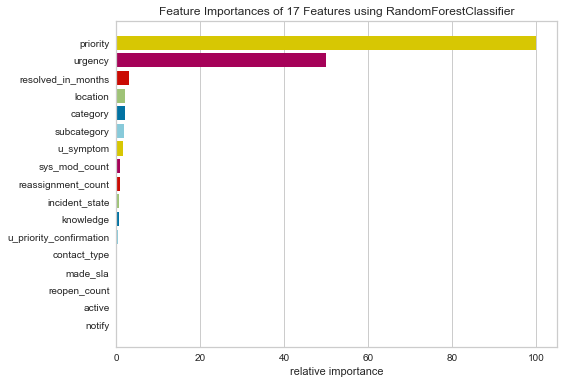

<AxesSubplot:title={'center':'Feature Importances of 17 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [43]:
from yellowbrick.features import FeatureImportances
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
viz=FeatureImportances(clf)
viz.fit(x,y)
viz.poof()

In [44]:
X=x.drop(columns=['priority','urgency'])
Y=y

In [45]:
X.columns

Index(['incident_state', 'active', 'reassignment_count', 'reopen_count',
       'sys_mod_count', 'resolved_in_months', 'made_sla', 'contact_type',
       'knowledge', 'u_priority_confirmation', 'notify', 'location',
       'category', 'subcategory', 'u_symptom'],
      dtype='object')

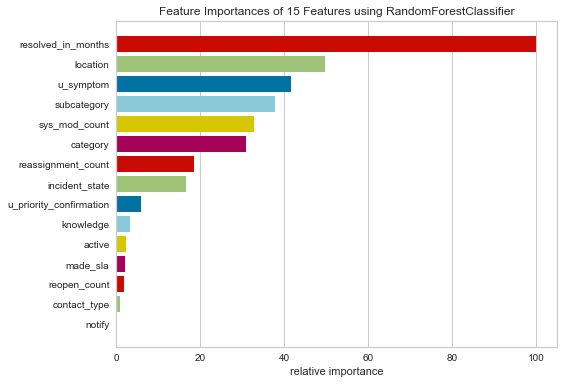

<AxesSubplot:title={'center':'Feature Importances of 15 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [46]:
clf=RandomForestClassifier()
viz=FeatureImportances(clf)
viz.fit(X,Y)
viz.poof()

# 5. Finally Model Building

In [47]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.7,random_state=50)

In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from collections import Counter

print('counting the categories: ',Counter(y_train))

counting the categories:  Counter({'Medium': 94100, 'Low': 2677, 'High': 2421})


In [49]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  796    21   253]
 [   11   859   339]
 [  302   334 39599]]
0.9703627040504305
              precision    recall  f1-score   support

        High       0.72      0.74      0.73      1070
         Low       0.71      0.71      0.71      1209
      Medium       0.99      0.98      0.98     40235

    accuracy                           0.97     42514
   macro avg       0.80      0.81      0.81     42514
weighted avg       0.97      0.97      0.97     42514



In [50]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(class_weight={'High':0.1,'Medium':0.3,'Low':0.7},random_state=30)
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  838    15   217]
 [   12   912   285]
 [  295   340 39600]]
0.9726207837418263
              precision    recall  f1-score   support

        High       0.73      0.78      0.76      1070
         Low       0.72      0.75      0.74      1209
      Medium       0.99      0.98      0.99     40235

    accuracy                           0.97     42514
   macro avg       0.81      0.84      0.83     42514
weighted avg       0.97      0.97      0.97     42514



*__*Above f1 score is considered as model score.__*

In [51]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [52]:
model12=DecisionTreeClassifier(class_weight={'High':0.1,'Medium':0.3,'Low':0.7},random_state=30)

stratified_kfold=StratifiedKFold(n_splits=100)
scores=cross_val_score(model,x_train,y_train,cv=stratified_kfold,scoring='f1_macro',n_jobs=-1)
print(scores.mean())

0.8221143880229068


In [53]:
from mlxtend.plotting import plot_learning_curves

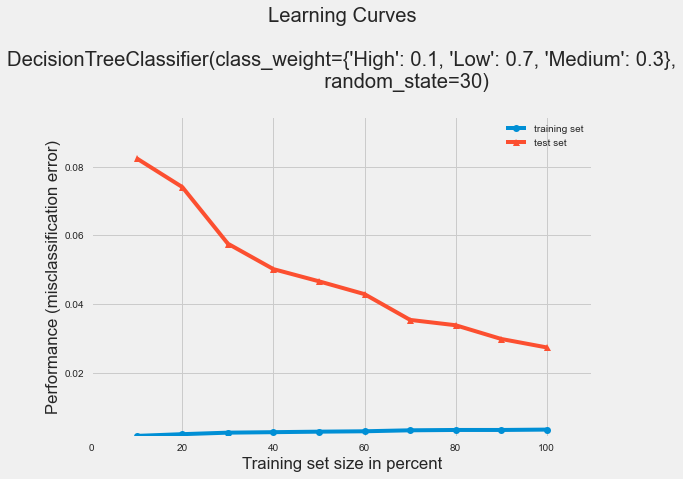

In [54]:
plot_learning_curves(x_train,y_train,x_test,y_test,model,print_model=True);

In [55]:
import pickle

file=open('project_incident_impact.pkl','wb')
pickle.dump(model,file)
file.close()